 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [507]:
# Reading whale returns
csv_path = Path('../Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv(csv_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [508]:
# Verify data type
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [509]:
# Count nulls
whale_returns.isnull().sum(axis = 0)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [510]:
# Drop nulls
whale_returns.dropna(subset=['SOROS FUND MANAGEMENT LLC'], inplace=True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [511]:
# Reading algorithmic returns
csv_path = Path('../Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(csv_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [512]:
# Verify data type
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [513]:
# Count nulls
algo_returns.isnull().sum(axis = 0)

Algo 1    0
Algo 2    6
dtype: int64

In [514]:
# Drop nulls
algo_returns.dropna(subset=['Algo 2'], inplace=True )
algo_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [515]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path('../Starter_Code/Resources/sp_tsx_history.csv')
sp_tsx_returns = pd.read_csv(csv_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
#sp_tsx_returns = pd.read_csv(csv_path)
sp_tsx_returns.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [516]:
# Check Data Types
sp_tsx_returns.dtypes

Close    object
dtype: object

In [518]:
# Fix Data Types
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].replace({'\$':''}, regex = True)
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].replace({',':''}, regex = True)

In [520]:
# Change data type to float
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].apply(pd.to_numeric)
sp_tsx_returns.dtypes

Close    float64
dtype: object

In [521]:
# Calculate Daily Returns
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].pct_change()
sp_tsx_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [522]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True )
sp_tsx_returns.head()

Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

In [523]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={'Close': 'SP TSX'})
print(sp_tsx_returns)

              SP TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1817 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [524]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis = "columns", join = "inner")
combined_df = combined_df.sort_index()
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2    SP TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555  
...              ...       ...  
2019-04-25 -0.007247 -0.000628  
2019-04-26  0.005256  0.002254  
2019-04-29  0.002829 -0.000788  
2019-04-30 -0.001570 -0.001183  
2019-05-01 -0.007358 -0.004703  

[1029 rows x 7 columns]

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

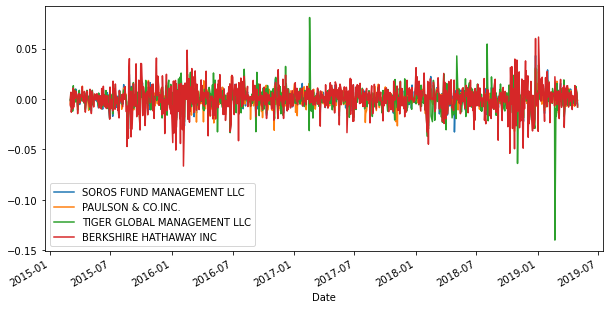

In [526]:
# Plot daily returns of all portfolios

# Plot whale portfolio returns
whale_returns.plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

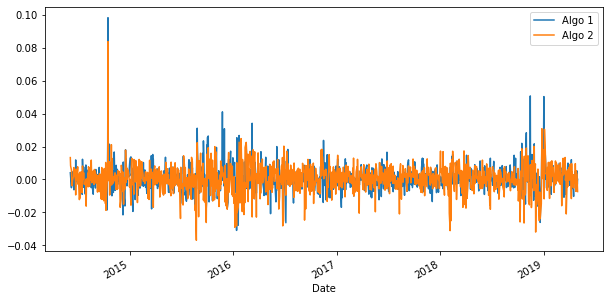

In [527]:
# Plot algorithmic portfolio returns
algo_returns.plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

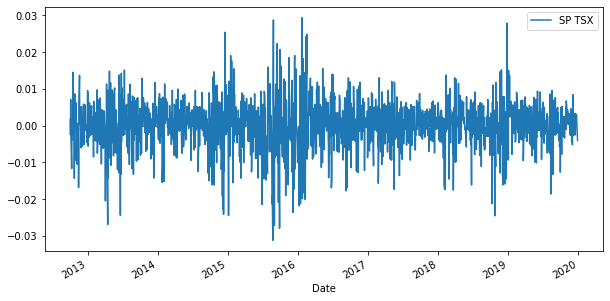

In [528]:
# Plot S&P portfolio returns
sp_tsx_returns.plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

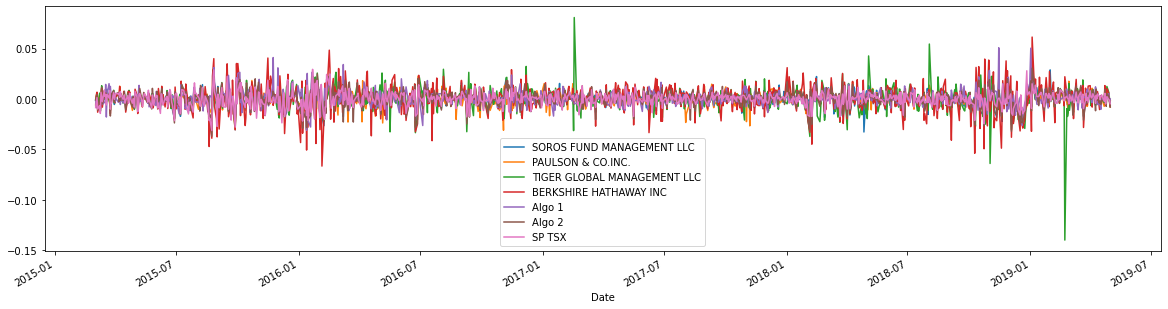

In [529]:
# Plot the combined dataframe
combined_df.plot(figsize=(20, 5))

#### Calculate and Plot cumulative returns.

In [530]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504                0.993431  0.998058   
2015-03-04                     0.996972                0.997617  0.989486   
2015-03-05                     0.999319                1.004327  0.988541   
2015-03-06                     0.990844                0.991172  0.983641   
2015-03-09                     0.996633                0.989534  0.978283   

              Algo 2    SP TSX  
Date                            
2015-03-03  0.999051  0.991470  
2015-03-04  1.001464  0.988128  
2015-03-05  1.005794  0.989456  
2015-03-06  0.994267  0.979589  
2015-03-09  0.995563  0.973168

<AxesSubplot:xlabel='Date'>

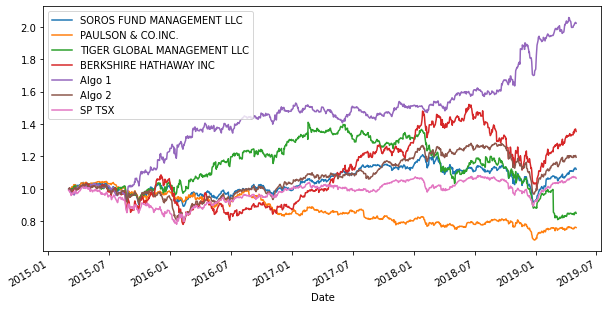

In [531]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

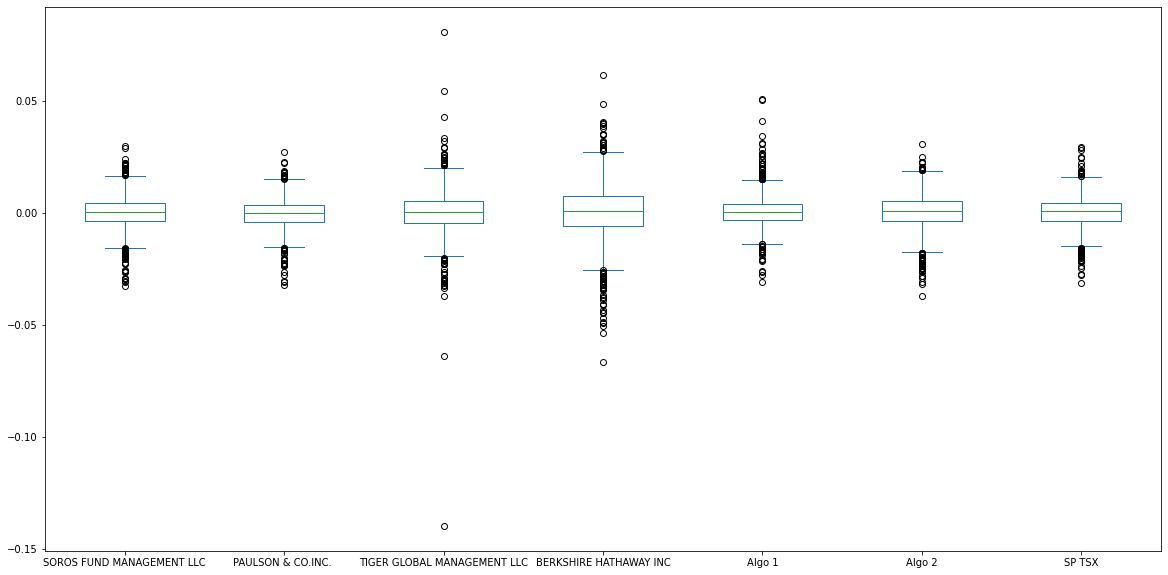

In [532]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [533]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX                         0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [534]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns_std = sp_tsx_returns.std()
print(sp_tsx_returns_std)

SP TSX    0.006637
dtype: float64


In [535]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
print(daily_std)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP TSX                         0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


### Calculate the Annualized Standard Deviation

In [536]:
# Calculate the annualized standard deviation (252 trading days)
# Also referred to as stock's volatility
annualized_std = daily_std * np.sqrt(252)
print(annualized_std)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP TSX                         0.111664
PAULSON & CO.INC.              0.110841
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [537]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                          NaN                     NaN       NaN   
2015-03-05                          NaN                     NaN       NaN   
2015-03-06                          NaN                     NaN       NaN   
2015-03-09                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-04-25                     0.004917                0.006641  0.005801   
2019-04-26                     0.005424                0.006599  0.005562   
2019-04-29                     0.005438                0.006584  0.005251   
2019-04-30                     0.005419                0.006323  0.005294   
2019-05-01                     0.005744                0.006143  0.004972   

              Algo 2    SP TSX  
Date                            
2015-03-03       NaN       NaN  
2015-03-04       NaN       NaN  
2015-03-05       NaN       NaN  
2015-03-06       NaN       NaN  
2015-03-09       NaN       NaN  
...              ...       ...  
2019-04-25  0.005764  0.003370  
2019-04-26  0.005700  0.003321  
2019-04-29  0.005622  0.003356  
2019-04-30  0.005600  0.003240  
2019-05-01  0.005686  0.003150  

[1029 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

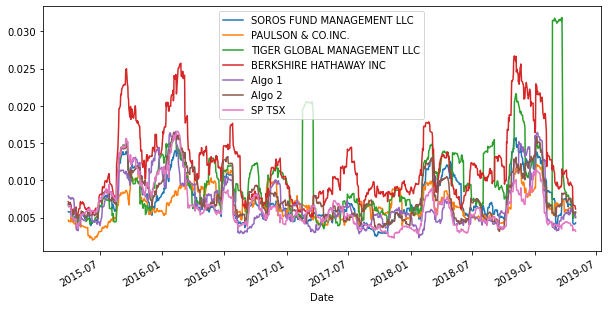

In [538]:
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [539]:
# Calculate the correlation
correlation = combined_df.corr()

In [540]:
# Display de correlation matrix
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
SP TSX                                        0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
SP TSX                                          0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
SP TSX                                     0.557250  0.310276  0.737370   

                               SP TSX  
SOROS FUND MANAGEMENT LLC    0.673930  
PAULSON & CO.INC.            0.486511  
TIGER GLOBAL MANAGEMENT LLC  0.440583  
BERKSHIRE HATHAWAY INC       0.557250  
Algo 1                       0.310276  
Algo 2                       0.737370  
SP TSX                       1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [541]:
# Calculate covariance of a single portfolio

# SOROS FUND MANAGEMENT LLC
covariance_soros_sp = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['SP TSX'])
print(covariance_soros_sp)

3.710689907855223e-05


In [ ]:
# PAULSON & CO.INC.
covariance_paulson_sp = combined_df['PAULSON & CO.INC.'].cov(combined_df['SP TSX'])
covariance_paulson_sp

In [543]:
# TIGER GLOBAL MANAGEMENT LLC
covariance_tiger_sp = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['SP TSX'])
print(covariance_tiger_sp)

3.372724149435499e-05


In [544]:
# BERKSHIRE HATHAWAY INC
covariance_berkshire_sp = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP TSX'])
print(covariance_berkshire_sp)

5.027336077110013e-05


In [545]:
# Algo 1
covariance_algo_1_sp = combined_df['Algo 1'].cov(combined_df['SP TSX'])
print(covariance_algo_1_sp)

1.6563000308911385e-05


In [546]:
# Algo 2
covariance_algo_2_sp = combined_df['Algo 2'].cov(combined_df['SP TSX'])
print(covariance_algo_2_sp)

4.3187044300842595e-05


In [548]:
# Calculate variance of S&P TSX
variance = combined_df['SP TSX'].var()
variance

4.9479515915131015e-05

In [549]:
# Computing beta
soros_beta = covariance_soros_sp / variance
soros_beta

0.7499446668435332

In [550]:
tiger_beta = covariance_tiger_sp / variance
tiger_beta

0.6816404904244642

In [551]:
berkshire_beta = covariance_berkshire_sp / variance
berkshire_beta

1.0160439091063613

In [552]:
algo_1_beta = covariance_algo_1_sp / variance
algo_1_beta

0.3347445908185686

In [553]:
algo_2_beta = covariance_algo_2_sp / variance
algo_2_beta

0.8728267344999598

In [ ]:
# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [555]:
# Annualized Sharpe Ratios
correlation.sum(axis=0).sort_values()

Algo 1                         2.626504
TIGER GLOBAL MANAGEMENT LLC    3.526030
PAULSON & CO.INC.              4.097032
SP TSX                         4.205921
BERKSHIRE HATHAWAY INC         4.244975
Algo 2                         4.714805
SOROS FUND MANAGEMENT LLC      4.822611
dtype: float64

In [557]:
# Computing Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX                         0.195550
dtype: float64

<AxesSubplot:>

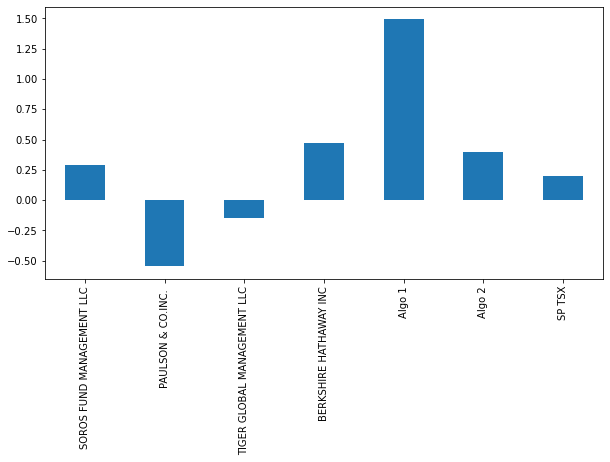

In [561]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize = (10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Yes, the algorithmic strategies outperform both the market and the whales portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!